In [1]:
import numpy as np
import PIL
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import stats
import argparse
import os

# 1  Helping functions to load & print images

## task 1.1

In [2]:
def read_images(files):
    images = np.array([cv.imread(fn) for fn in files])
    return images

In [3]:
files=np.array(['img/1.JPG','img/2.JPG','img/3.JPG','img/4.JPG','img/5.JPG'])

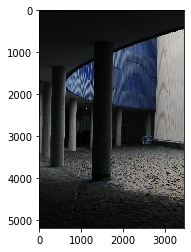

In [4]:
images=read_images(files)
plt.imshow(images[4])

## Task 1.2

In [5]:
def printimages(images, rows, cols):
    fig, axes = plt.subplots(
    ncols=cols,
    nrows=rows,figsize=(18,12))
    for img, ax in zip(images, axes.flat):
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        ax.imshow(img)
    

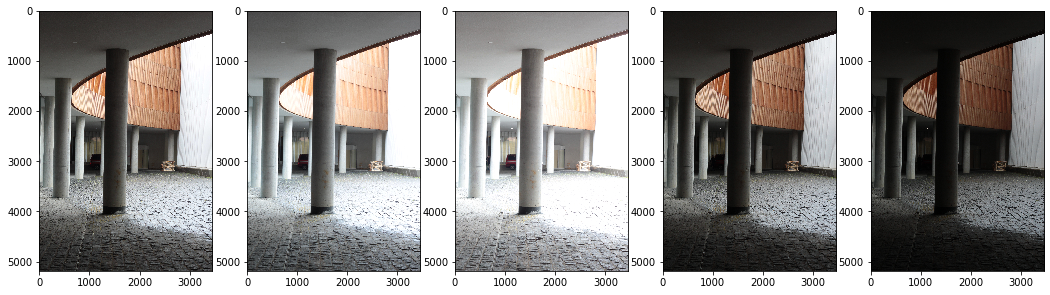

In [6]:
printimages(images,1,5)

# Task 2 HDR
## 2.2

In [7]:
def grayscale(image):
    image=cv.cvtColor(image, cv.COLOR_BGR2RGB)
    grayscale=(0.299*image[:,:,0]+0.587*image[:,:,1]+0.114*image[:,:,2]).astype(int)
    return grayscale
    

(5184, 3456)


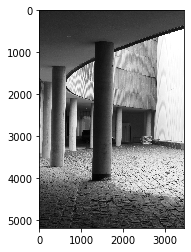

In [8]:
gray = grayscale(images[0])
print(gray.shape)
plt.imshow(gray,cmap='gray')

## Task 2.3

In [9]:
def histogram(image,name="",hist=False):
    average=np.average(image)
    mode=stats.mode(image,axis=None)[0][0]
    median=np.median(image)
    twenty=np.percentile(image,20)
    eighty=np.percentile(image,80)
    if hist==True:
        plt.figure(figsize=(18,6))
        gray_hist=image.flatten()
        plt.hist(gray_hist,bins=256,range=(0,256))
        plt.axvline(x=average,color='r',label='average')
        plt.axvline(x=mode,color='g',label='mode')
        plt.axvline(x=median,color='b',label='median')
        plt.axvline(x=twenty,color='c',label='twenty')
        plt.axvline(x=eighty,color='orange',label='eighty')
        plt.legend(loc='best')
        plt.title(name)
    return average,mode,median,twenty,eighty
    

average 115.5067269282086 mode 255 median 92.0 twenty 49.0 eighty 195.0


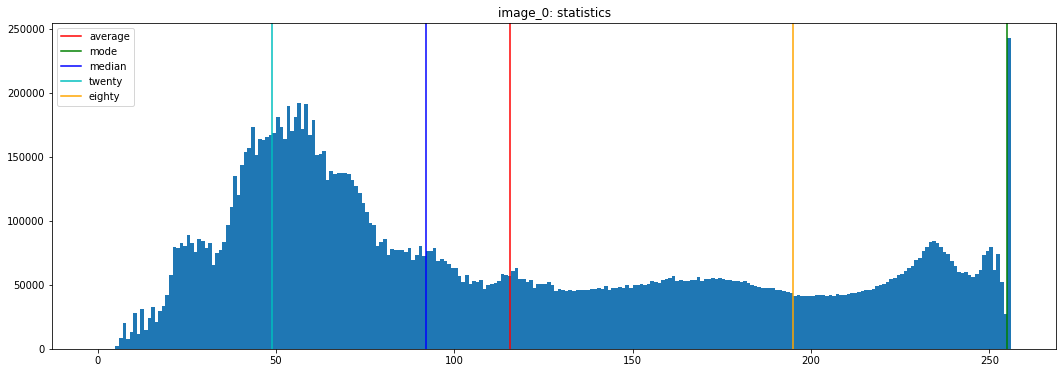

In [10]:
average,mode,median,twenty,eighty=histogram(gray,'image_0: statistics',hist=True)
print('average',average,'mode',mode,'median',median,'twenty',twenty,'eighty',eighty)

## Task 2.4

In [11]:
def threshbitmap(image,threshold):
    image_n=image.copy()
    image_n[image_n<=threshold]=0
    image_n[image_n>threshold]=255
    return image_n

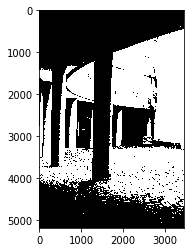

In [12]:
bitmap=threshbitmap(gray,110)
plt.imshow(bitmap,cmap='gray')

## Task 2.5

The logic are following, if we have dark image we need take more bright parts, if we have bright image we need take dark parts

In [13]:
gray1 = grayscale(images[0])
gray2 = grayscale(images[1])
gray3 = grayscale(images[2])
gray4 = grayscale(images[3])
gray5 = grayscale(images[4])

bitmap0=threshbitmap(gray1,median)
bitmap1=threshbitmap(gray2,median)
bitmap2=threshbitmap(gray3,twenty)
bitmap3=threshbitmap(gray4,average)
bitmap4=threshbitmap(gray2,eighty)
bitmaps=[bitmap0,bitmap1,bitmap2,bitmap3,bitmap4]

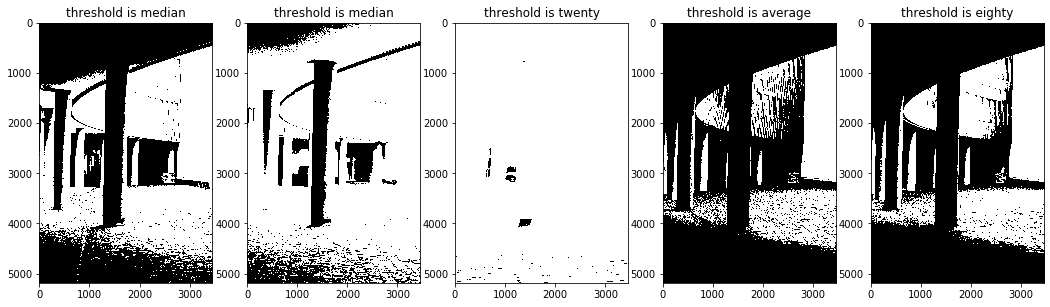

In [14]:
labels=['threshold is median','threshold is median','threshold is twenty','threshold is average','threshold is eighty']
fig, axes = plt.subplots(
ncols=5,
nrows=1,figsize=(18,12))
for img, ax,label in zip(bitmaps, axes.flat,labels):
    ax.imshow(img,cmap='gray')
    ax.set_title(label)

## Task 2.6

In [15]:
def exclusionbitmap(image,threshold):
    im_n=image.copy()
    im_n[(image>= threshold-4) & (im_n <= threshold+4)]=0
    im_n[(image< threshold-4) | (im_n > threshold+4)]=255
    return im_n

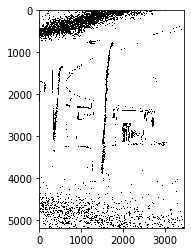

In [16]:
exclbitmap =exclusionbitmap(gray,50)
plt.imshow(exclbitmap,cmap='gray')

## Task 2.7

In [17]:
def shiftbitmap(image, xs, ys):
    new_im=image.copy()
    new_im_xs_shift=np.roll(image,xs,axis=1)
    new_im_ys_shift=np.roll(new_im_xs_shift,ys,axis=0)
    new_im_ys_shift[:ys]=0
    new_im_ys_shift[:,:xs]=0
    return new_im_ys_shift

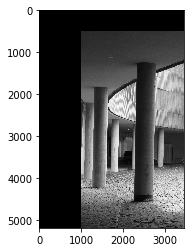

In [18]:
shiftedbitmap=shiftbitmap(gray,1000,500)
plt.imshow(shiftedbitmap,cmap='gray')

## Task 2.8

In [19]:
def XORbitmap(image1, image2):
    result=np.bitwise_xor(image1,image2)
    return result

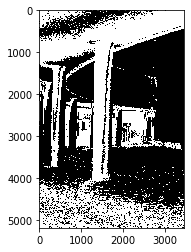

In [20]:
plt.imshow(XORbitmap(exclbitmap,bitmap0),cmap='gray')

## Task 2.9

In [21]:
def ANDbitmap(image1, image2):
    result=np.bitwise_and(image1,image2)
    return result

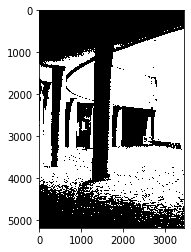

In [22]:
plt.imshow(ANDbitmap(exclbitmap,bitmap0),cmap='gray')

# Task 2.10

In [23]:
test_files=np.array(['img/img_0.25.jpg','img/img_15.jpg','img/img_2.5.jpg','img/img_0.033.jpg'])

In [24]:
test_images=read_images(test_files)

In [25]:
def getshift(image1,image2,max_shift):
    im1=image1
    im2=image2
    values=[]
    coordinates=[]
    for shift in range(max_shift):
        im1=cv.resize(im1,None,fx=0.5,fy=0.5)
        im2=cv.resize(im2,None,fx=0.5,fy=0.5)
        
        gray_1=grayscale(im1)
        gray_2=grayscale(im2)
        
        average,mode,median,twenty,eighty=histogram(gray_1,'image_0: statistics',hist=False)
        average_1,mode_1,median_1,twenty_1,eighty_1=histogram(gray_2,'image_0: statistics',hist=False)
        
        th_bitmap1=threshbitmap(gray_1,median)
        th_bitmap2=threshbitmap(gray_2,median_1)
        
        e_bitmap1=exclusionbitmap(gray_1,median)
        e_bitmap2=exclusionbitmap(gray_2,median_1)
        

        shiftbitmap_th=shiftbitmap(th_bitmap2,1,1)
        shiftbitmap_e=shiftbitmap(e_bitmap2,1,1)
        
        Xor_d=XORbitmap(th_bitmap1,shiftbitmap_th)
        AND_d=ANDbitmap(Xor_d,e_bitmap1)
        AND_d1=ANDbitmap(AND_d,shiftbitmap_e)
        
        total_value=np.sum(AND_d1)
        
        values.append(total_value)
    min_val=np.min(values)
    return min_val

In [26]:
getshift(test_images[0],test_images[3],9)

0

## Task 2.11


In [27]:
labs=['img/img_15.jpg','img/img_2.5.jpg','img/img_0.033.jpg']
for img,l in zip(test_images[1:],labs):
    print('for'+str(l),getshift(test_images[0],img,9))

forimg/img_15.jpg 765
forimg/img_2.5.jpg 765
forimg/img_0.033.jpg 0


## Task 2.12

In [28]:
times=np.array([0.3,1/6,1/13,1/50],dtype=np.float32)

In [29]:
calibrate = cv.createCalibrateDebevec()
CRF=calibrate.process(test_images,times)

In [30]:
CRF[0]

array([[0.3896275 , 0.42577043, 0.35667452]], dtype=float32)

## Task 2.13

In [31]:
merge_debevec = cv.createMergeDebevec()
hdr = merge_debevec.process(test_images, times, CRF)
cv.imwrite('hdr.hdr', hdr)

True

## Task 2.14

In [32]:
tonemap = cv.createTonemap(2.2)
ldr = tonemap.process(hdr)

In [33]:
result = np.clip(ldr*255, 0, 255).astype('uint8')




In [34]:
cv.imwrite('result.png', result)



True

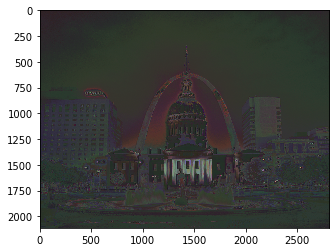

In [36]:
plt.imshow(result)